Network Models: Random Graphs

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
N = 100
av_degree = 8
p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

N = len(GER)
M = GER.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 100
Number of edges: 420
Average degre: 8.4


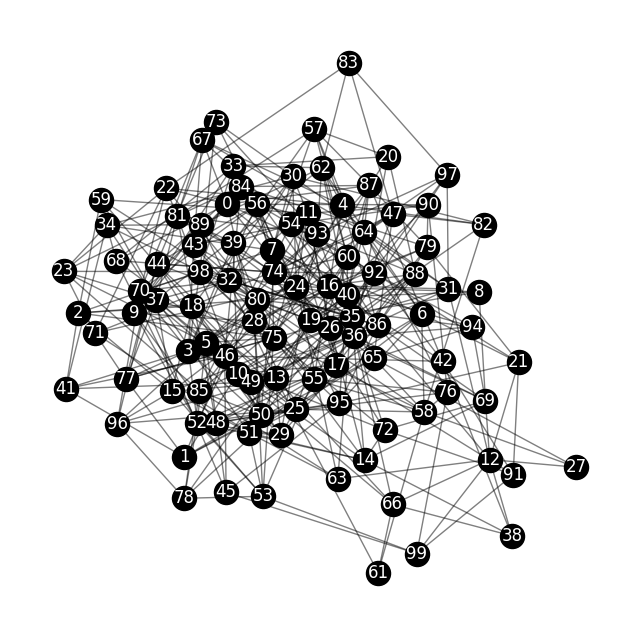

In [3]:
pos = nx.fruchterman_reingold_layout(GER)
plt.figure(figsize=(8,8))
plt.axis("off")
nx.draw_networkx_nodes(GER, pos, node_size=300, node_color="black")
nx.draw_networkx_edges(GER, pos, alpha=0.500)
nx.draw_networkx_labels(GER, pos, font_color="white")
plt.show()

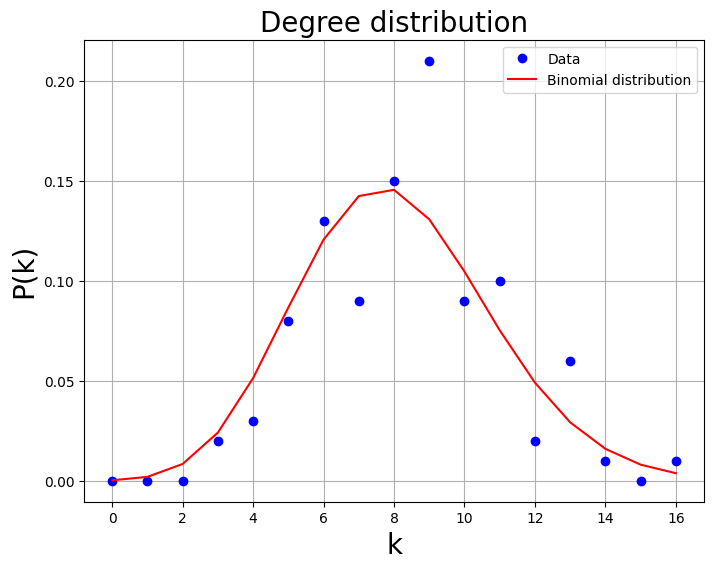

In [4]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

ks, Pk = degree_distribution(GER)

plt.figure(figsize=(8,6))
plt.plot(ks,Pk,'bo', label='Data')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file

## Fitting of. binomial distribution
from scipy.stats import binom
pk = binom.pmf(ks, N, p)
plt.plot(ks, pk, 'r', label='Binomial distribution')
plt.legend()
plt.show(True)

In [5]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M
k2 = momment_of_degree_distribution(GER,2)
print('Second momment of P(k):', k2)

Second momment of P(k): 77.0


In [6]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H
H = shannon_entropy(GER)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  3.2690


In [7]:
avc = nx.average_clustering(GER)
print("Average clustering:", "%3.4f"%avc, '|p = ', p)

Average clustering: 0.0887 |p =  0.08080808080808081


In [8]:
CC = (nx.transitivity(GER)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.0840


In [9]:
if nx.is_connected(GER) == True:
    l = nx.average_shortest_path_length(GER)
    print("Average shortest path length:", "%3.4f"%l)
else:
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G=Gcc[0]
    print('We will use only the largest component')
    N = len(GER)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    print('Average degre:', 2*M/N)
    l = nx.average_shortest_path_length(GER)
    print("Average shortest path length:", "%3.4f"%l)
print('The predicted value is log(N)/log(average degree)', log(N)/log(av_degree))

Average shortest path length: 2.3830
The predicted value is log(N)/log(average degree) 2.2146187299249087


In [10]:
d = nx.diameter(GER)
print('Network diameter:', d)

Network diameter: 4


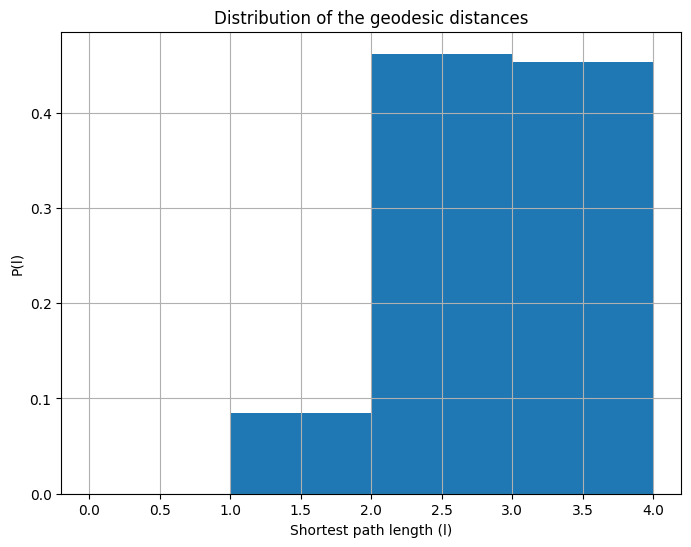

In [11]:
plt.figure(figsize=(8,6))

if nx.is_connected(GER) == True:
    D = zeros(shape=(N,N)) # D is the matrix of distances
    vl = []
    for i in arange(0,N):
        for j in arange(i+1, N):
            if(i != j):
                aux = nx.shortest_path(GER,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    x = range(0,d+1)
    plt.hist(vl, bins = x, density=True)
    plt.title("Distribution of the geodesic distances")
    plt.ylabel("P(l)")
    plt.xlabel("Shortest path length (l)")
    plt.grid(True)
    plt.savefig('av_short_path.eps')
    plt.show(True)
else:
    print("The graph has more than one connected component")

In [12]:
r=nx.degree_assortativity_coefficient(GER)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.0074


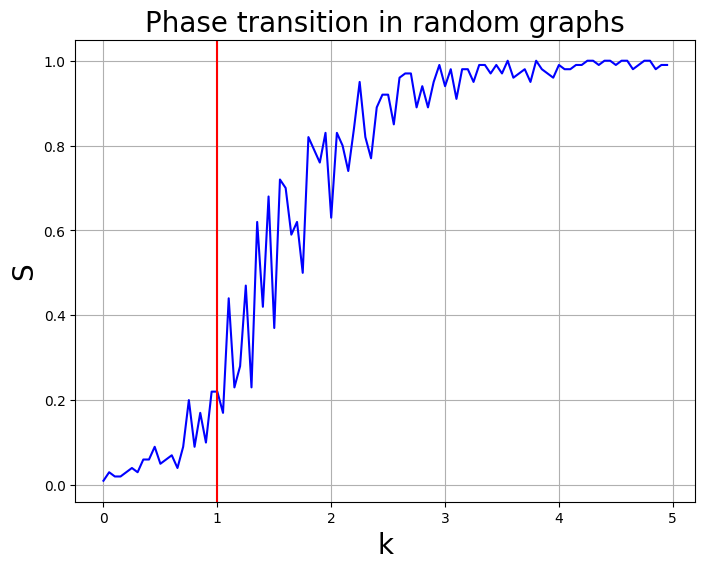

In [13]:
N = 100
S = []
vk = []
for c in arange(0, 5, 0.05):
    p = c/(N-1)
    G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    S.append(len(G)/N)
    vk.append(c)
    #print(c, len(G))
plt.figure(figsize=(8,6))
plt.plot(vk,S,'b', label='Largest component size')
plt.xlabel("k", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.title("Phase transition in random graphs", fontsize=20)
plt.axvline(x=1, color = 'r')
plt.grid(True)
plt.savefig('S.eps') #save the figure into a file
plt.show()

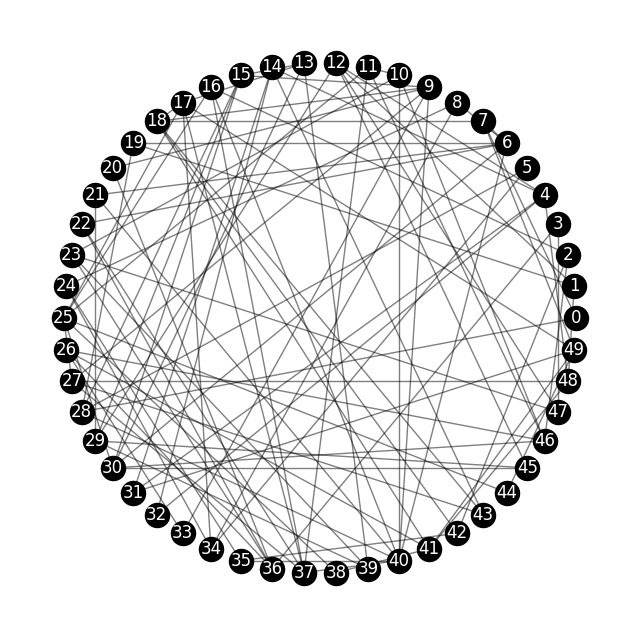

In [14]:
N = 50
av_degree = 8
k = int(av_degree/2)
p = 1 #probability of rewiring
GWS = nx.watts_strogatz_graph(N, k, p, seed=None)

pos = nx.circular_layout(GWS)
plt.figure(figsize=(8,8))
plt.axis("off")
nx.draw_networkx_nodes(GWS, pos, node_size=300, node_color="black")
nx.draw_networkx_edges(GWS, pos, alpha=0.500)
nx.draw_networkx_labels(GWS, pos, font_color="white")
plt.show()

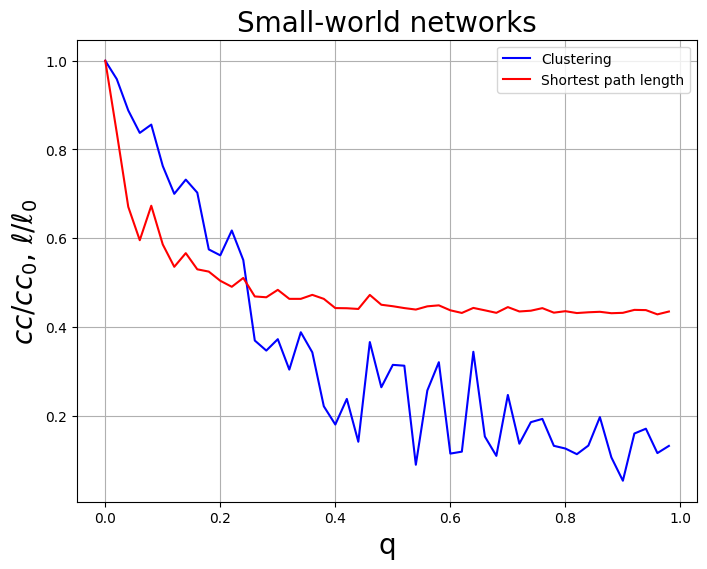

In [15]:
N = 50
av_degree = 8
k = int(av_degree/2)
vcc = []
vl = []
vq = []
for q in arange(0, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=None)
    cc = nx.average_clustering(G)
    vcc.append(cc)
    l = nx.average_shortest_path_length(G)
    vl.append(l)
    vq.append(q)
plt.figure(figsize=(8,6))
plt.plot(vq,np.array(vcc)/vcc[0],'b', label='Clustering')
plt.plot(vq,np.array(vl)/vl[0],'r', label='Shortest path length')
plt.xlabel("q", fontsize=20)
plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
#plt.savefig('WS.eps') #save the figure into a file
plt.show()

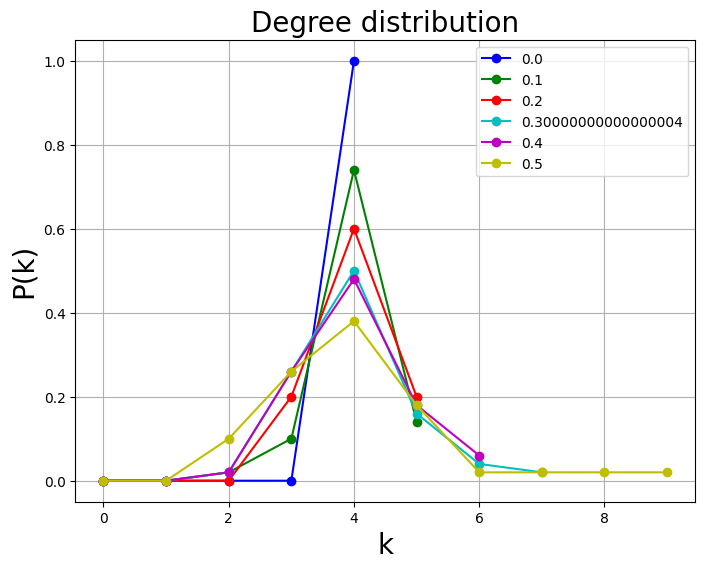

In [16]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure(figsize=(8,6))
aux = 0
for q in arange(0, 0.6, 0.1): #q is the rewiring probability
    GWS = nx.watts_strogatz_graph(N, k, q, seed=None)
    ks, Pk = degree_distribution(GWS)
    plt.plot(ks,Pk,'o-', color = colors[aux], label = str(q))
    aux = aux + 1
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
r=nx.degree_assortativity_coefficient(G)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.1316
